<a href="https://colab.research.google.com/github/shiva650897/Credit-card-default-prediction/blob/master/Oversampling_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest

In [0]:
rf1=rf.fit(X_train1,y_train1)
predyrf1=rf1.predict(X_test1)
print(classification_report(y_test1,predyrf1))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6987
           1       0.61      0.33      0.43      2013

    accuracy                           0.80      9000
   macro avg       0.72      0.64      0.66      9000
weighted avg       0.78      0.80      0.78      9000



In [0]:
X=df.drop('default',axis=1)
y=df.default

## Using upsampling:

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=1234)

In [0]:
X_train.shape,X_test.shape,y_train.shape

((21000, 32), (9000, 32), (21000,))

In [0]:
y_train.value_counts(1)

0    0.77881
1    0.22119
Name: default, dtype: float64

In [0]:
train_upsampled = pd.concat([X_train,y_train],axis=1)

In [0]:
# Separate majority and minority classes
train_majority = train_upsampled[train_upsampled.default==0]
train_minority = train_upsampled[train_upsampled.default==1]

In [0]:
train_minority.shape,train_majority.shape

((4645, 33), (16355, 33))

In [0]:
from sklearn.utils import resample

In [0]:
# Upsample minority class
train_minority_upsampled = resample(train_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=16355,    # to match majority class
                                 random_state=1234) # reproducible results

In [0]:
# Combine majority class with upsampled minority class
upsampled = pd.concat([train_majority, train_minority_upsampled])

In [0]:
upsampled.shape

(32710, 33)

In [0]:
x_train_upsampled=upsampled.drop('default',axis=1)

In [0]:
y_train_upsampled=upsampled.default

In [0]:
y_train_upsampled.shape

(32710,)

In [0]:
from sklearn.model_selection import GridSearchCV

## LogisticRegression upsampling

In [0]:
lr=LogisticRegression(solver='liblinear')
lr_params={'C':[0.001,0.01, 0.1, 1, 10],'class_weight':[None,'balanced'],'penalty':['l1','l2']}
lr_pred,lr_prob=gridsearchcv(lr,lr_params,x_train_upsampled,y_train_upsampled)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Params: {'C': 10, 'class_weight': None, 'penalty': 'l1'}
Best auc on training set: 0.72995487894254
Best auc on test set: 0.7263557029603683


In [0]:
clf_2 = LogisticRegression(C=10,class_weight='balanced',penalty='l1').fit(x_train_upsampled, y_train_upsampled)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
pred_y_2 = clf_2.predict(X_test)

In [0]:
accuracy_score(y_test, pred_y_2)

0.6916666666666667

In [0]:
confusion_matrix(y_test, pred_y_2)

array([[4951, 2058],
       [ 717, 1274]])

In [0]:
print(classification_report(y_test, pred_y_2))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      7009
           1       0.38      0.64      0.48      1991

    accuracy                           0.69      9000
   macro avg       0.63      0.67      0.63      9000
weighted avg       0.76      0.69      0.71      9000



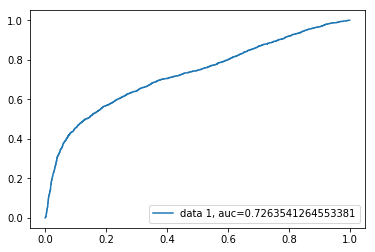

In [0]:
test_pred_proba = clf_2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred_proba)
auc = metrics.roc_auc_score(y_test, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

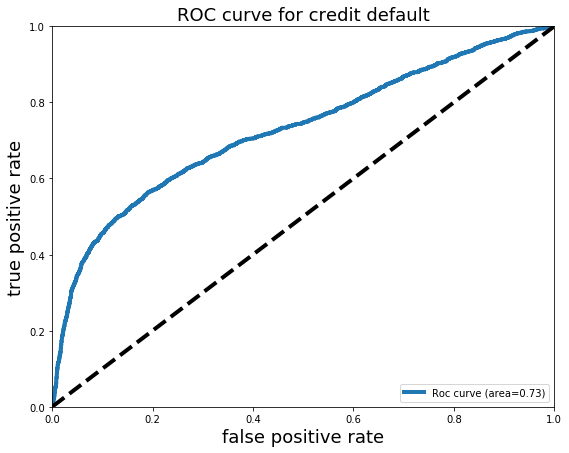

In [0]:
plot_roc(lr_prob)

## Decision Tree with upsampling

In [0]:
DTupsampled=DT2.fit(x_train_upsampled, y_train_upsampled)
predydt3=DTupsampled.predict(X_test)
print(classification_report(y_test,predydt3))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7009
           1       0.39      0.39      0.39      1991

    accuracy                           0.73      9000
   macro avg       0.61      0.61      0.61      9000
weighted avg       0.73      0.73      0.73      9000



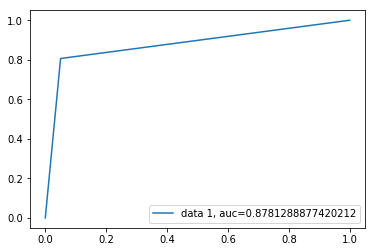

In [0]:
test_pred_proba = DTupsampled.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred_proba)
auc = metrics.roc_auc_score(y_test, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:

from scipy.stats import randint 
param_DT = {"max_depth": [3, None], 
              "max_features": list(range(1, 9)), 
              "min_samples_leaf": list(range(1, 9)), 
              "criterion": ["gini", "entropy"]} 

In [0]:
gs_dt_upsampling=GridSearchCV(DT2,param_DT,
                    scoring='roc_auc',
                    n_jobs=-1)

In [0]:
gs_dt_upsampling.fit(x_train_upsampled,y_train_upsampled)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None],
                   

In [0]:
print("Best auc on training set:",gs_dt_upsampling.best_score_)
print('Best auc on test set:',gs_dt_upsampling.score(X_test,y_test))

Best auc on training set: 0.8711128416273326
Best auc on test set: 0.6125578371325552


## Random forest with upsampling

In [0]:
rf=RandomForestClassifier(bootstrap= False, criterion = 'gini', n_estimators= 500)
rf2=rf.fit(x_train_upsampled,y_train_upsampled)
predyrf2=rf2.predict(X_test)
print(classification_report(y_test,predyrf2))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7009
           1       0.65      0.33      0.44      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.64      0.66      9000
weighted avg       0.79      0.81      0.79      9000



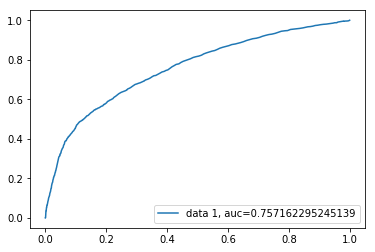

In [0]:
test_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred_proba)
auc = metrics.roc_auc_score(y_test, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Random Forest with grid search cv

classifier = RandomForestClassifier(n_estimators=300, random_state=0)
grid_param = {
    'n_estimators': [100, 300, 500],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)
gd_sr.fit(x_train_upsampled,y_train_upsampled)
best_parameters = gd_sr.best_params_
print(best_parameters)


## Smote technique:

In [0]:
X=df.drop("default",axis=1)
y=df.default

In [0]:
X.shape

(30000, 32)

In [0]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
def makeOverSamplesSMOTE(X,y):
    X_train=X
    y_train=y
    sm = SMOTE(random_state=1234)
    X, y = sm.fit_sample(X_train, y_train)
    return X,y

In [0]:
xsmote,ysmote = makeOverSamplesSMOTE(X_train,y_train)

In [0]:
xsmote.shape,ysmote.shape

((32710, 32), (32710,))

## LogisticRegression with Smote

In [0]:
lr_smote=LogisticRegression()

In [0]:
model3=lr_smote.fit(xsmote,ysmote)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
pred_y3 = model3.predict(X_test)

In [0]:
print(classification_report(y_test,pred_y3))

              precision    recall  f1-score   support

           0       0.87      0.51      0.64      7009
           1       0.30      0.73      0.42      1991

    accuracy                           0.56      9000
   macro avg       0.58      0.62      0.53      9000
weighted avg       0.74      0.56      0.59      9000



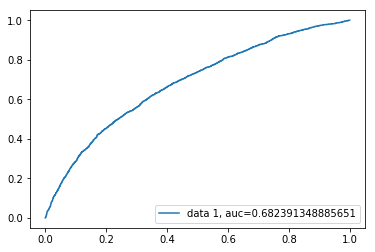

In [0]:
test_pred_proba = model3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred_proba)
auc = metrics.roc_auc_score(y_test, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Decision Tree with Smote

In [0]:
DT_smote=DT2.fit(xsmote,ysmote)
predydt4=DT_smote.predict(X_test)
print(classification_report(y_test,predydt4))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81      7009
           1       0.37      0.44      0.40      1991

    accuracy                           0.71      9000
   macro avg       0.60      0.61      0.60      9000
weighted avg       0.73      0.71      0.72      9000



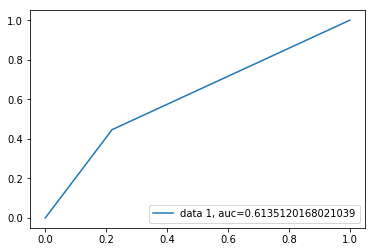

In [0]:
test_pred_proba = DT_smote.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred_proba)
auc = metrics.roc_auc_score(y_test, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Random Forest with Smote

In [0]:
rf_smote=rf.fit(xsmote,ysmote)
predyrf3=rf_smote.predict(X_test)
print(classification_report(y_test,predyrf3))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      7009
           1       0.57      0.41      0.48      1991

    accuracy                           0.80      9000
   macro avg       0.71      0.66      0.68      9000
weighted avg       0.78      0.80      0.79      9000



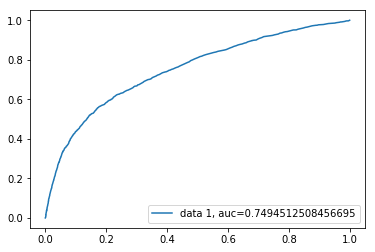

In [0]:
test_pred_proba = rf_smote.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred_proba)
auc = metrics.roc_auc_score(y_test, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## ADASYN 

In [0]:
from imblearn.over_sampling import ADASYN

In [0]:
def makeOverSamplesADASYN(X_train1,y_train1):
  
  X = X_train
  y = y_train
  sm = ADASYN(random_state=1234)
  X, y = sm.fit_sample(X, y)
  return X,y

In [0]:
X_train.shape,y_train.shape

((21000, 32), (21000,))

In [0]:
XADASYN,yADASYN = makeOverSamplesADASYN(X_train,y_train)

In [0]:
XADASYN.shape,yADASYN.shape

((33099, 32), (33099,))

## LogisticRegression with ADASYN

In [0]:
logAdasyn = LogisticRegression().fit(XADASYN,yADASYN)
pred_y4 = logAdasyn.predict(X_test)
print(classification_report(y_test,pred_y4))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.49      0.63      7009
           1       0.29      0.74      0.42      1991

    accuracy                           0.55      9000
   macro avg       0.58      0.61      0.52      9000
weighted avg       0.74      0.55      0.58      9000



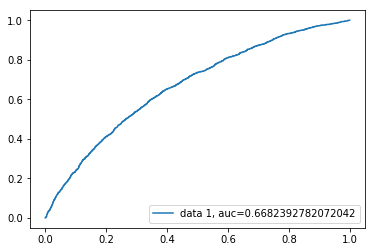

In [0]:
test_pred_proba = logAdasyn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred_proba)
auc = metrics.roc_auc_score(y_test, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Decision Tree with ADASYN

In [0]:
DT_adasyn=DT2.fit(XADASYN,yADASYN)
predydt5=DT_adasyn.predict(X_test)
print(classification_report(y_test,predydt5))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      7009
           1       0.37      0.42      0.39      1991

    accuracy                           0.71      9000
   macro avg       0.60      0.61      0.60      9000
weighted avg       0.73      0.71      0.72      9000



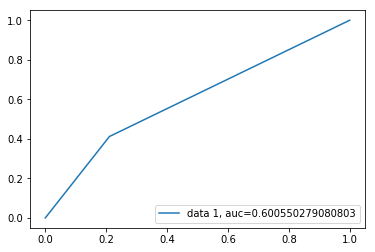

In [0]:
test_pred_proba = DT_adasyn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred_proba)
auc = metrics.roc_auc_score(y_test, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Random Forest with ADASYN

In [0]:
rf_adasyn=rf.fit(XADASYN,yADASYN)
predydt4=rf_adasyn.predict(X_test)
print(classification_report(y_test,predydt4))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      7009
           1       0.56      0.41      0.48      1991

    accuracy                           0.80      9000
   macro avg       0.70      0.66      0.68      9000
weighted avg       0.78      0.80      0.79      9000



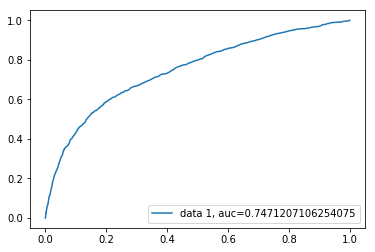

In [0]:
test_pred_proba = rf_adasyn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred_proba)
auc = metrics.roc_auc_score(y_test, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## SMOTEENN,SMOTETomek

In [0]:
from imblearn.combine import SMOTEENN,SMOTETomek

In [0]:
def makeOverSamplesSmoteenn(X,y):
  
  X = X_train
  y = y_train
  sm = SMOTEENN(random_state=123)
  X, y = sm.fit_sample(X, y)
  return X,y

In [0]:
XSmoteenn,ySmoteenn = makeOverSamplesSmoteenn(X,y)


## Logistic Regression with Smoteenn

In [0]:
logSmoteenn = LogisticRegression().fit(XSmoteenn,ySmoteenn)
pred_y5 = logSmoteenn.predict(X_test)
print(classification_report(y_test,pred_y5))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.89      0.35      0.50      7009
           1       0.27      0.85      0.41      1991

    accuracy                           0.46      9000
   macro avg       0.58      0.60      0.46      9000
weighted avg       0.76      0.46      0.48      9000



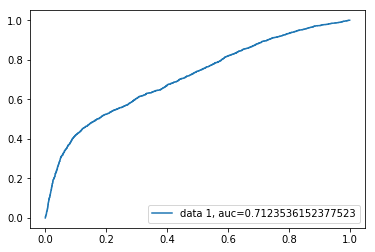

In [0]:
test_pred_proba = logSmoteenn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred_proba)
auc = metrics.roc_auc_score(y_test, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Decision tree with Smoteenn

In [0]:
DT_logSmoteenn=DT2.fit(XSmoteenn,ySmoteenn)
predydt5=DT_logSmoteenn.predict(X_test)
print(classification_report(y_test,predydt5))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76      7009
           1       0.35      0.60      0.44      1991

    accuracy                           0.66      9000
   macro avg       0.60      0.64      0.60      9000
weighted avg       0.74      0.66      0.69      9000



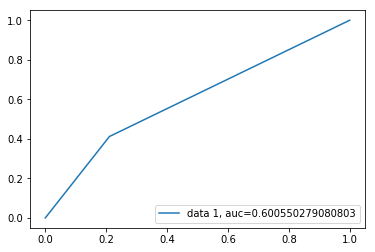

In [0]:
test_pred_proba = DT_logSmoteenn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred_proba)
auc = metrics.roc_auc_score(y_test, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Random Forest with Smoteenn

In [0]:
rf_logSmoteenn=rf.fit(XSmoteenn,ySmoteenn)
predyrf5=rf_logSmoteenn.predict(X_test)
print(classification_report(y_test,predyrf5))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      7009
           1       0.46      0.60      0.52      1991

    accuracy                           0.76      9000
   macro avg       0.67      0.70      0.68      9000
weighted avg       0.78      0.76      0.77      9000



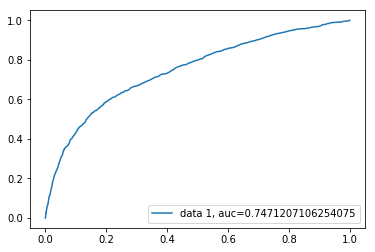

In [0]:
test_pred_proba = rf_logSmoteenn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred_proba)
auc = metrics.roc_auc_score(y_test, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
def makeOverSamplesSMOTETomek(X,y):
  
  X = X_train
  y = y_train
  sm = SMOTETomek(random_state=1234)
  X, y = sm.fit_sample(X, y)
  return X,y

In [0]:
XSMOTETomek,ySMOTETomek = makeOverSamplesSMOTETomek(X,y)

In [0]:
logSMOTETomek = LogisticRegression().fit(XSMOTETomek,ySMOTETomek)
pred_y6 = logSMOTETomek.predict(X_test)
print(classification_report(y_test,pred_y6))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.50      0.64      7009
           1       0.29      0.73      0.42      1991

    accuracy                           0.55      9000
   macro avg       0.58      0.62      0.53      9000
weighted avg       0.74      0.55      0.59      9000



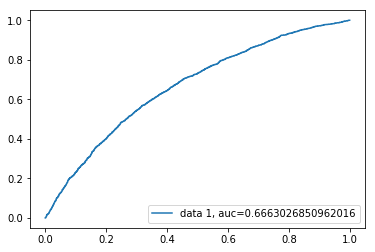

In [0]:
test_pred_proba = logSMOTETomek.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred_proba)
auc = metrics.roc_auc_score(y_test, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
DT_logSMOTETomek=DT2.fit(XSMOTETomek,ySMOTETomek)
predydt6=DT_logSMOTETomek.predict(X_test)
print(classification_report(y_test,predydt6))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      7009
           1       0.36      0.41      0.38      1991

    accuracy                           0.71      9000
   macro avg       0.59      0.60      0.59      9000
weighted avg       0.72      0.71      0.71      9000



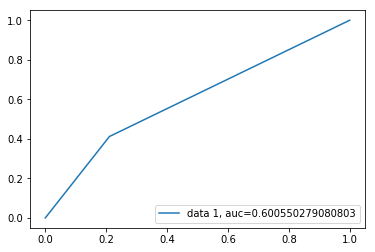

In [0]:
test_pred_proba = DT_logSMOTETomek.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred_proba)
auc = metrics.roc_auc_score(y_test, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
rf_logSMOTETomek=rf.fit(XSMOTETomek,ySMOTETomek)
predyrf6=rf_logSMOTETomek.predict(X_test)
print(classification_report(y_test,predyrf6))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      7009
           1       0.56      0.41      0.47      1991

    accuracy                           0.80      9000
   macro avg       0.70      0.66      0.67      9000
weighted avg       0.78      0.80      0.79      9000



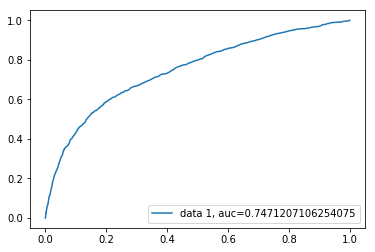

In [0]:
test_pred_proba = rf_logSMOTETomek.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  test_pred_proba)
auc = metrics.roc_auc_score(y_test, test_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Lift gain charts

In [0]:
pip install scikit-plot

In [0]:
import scikitplot as skplt

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


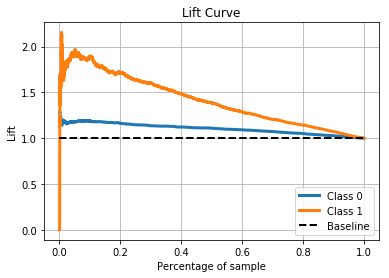

In [0]:
lr = LogisticRegression()
lr = lr.fit(XSMOTETomek,ySMOTETomek)
y_probas = lr.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()